In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D,MaxPool2D,AvgPool2D,Dense
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from sklearn.metrics import classification_report,confusion_matrix
import tensorflow as tf

In [2]:
for device in tf.config.list_physical_devices():
    print(": {}".format(device.name))

: /physical_device:CPU:0
: /physical_device:GPU:0


In [3]:
phy_dev=tf.config.list_physical_devices('GPU')

In [4]:
print("Num GPUs Available: ", len(phy_dev))

Num GPUs Available:  1


In [5]:
tf.config.experimental.set_memory_growth(phy_dev[0],True)

In [6]:
my_data_dir = 'C:\\Users\\ragav\\Desktop\\dl\\EXP_4\\cell_images'

In [7]:
os.listdir(my_data_dir)

['test', 'train']

In [8]:
test_path = my_data_dir+'/test/'
train_path = my_data_dir+'/train/'

In [9]:
train_image_gen = ImageDataGenerator(rotation_range=20, # rotate the image 20 degrees
                               rescale=1./255, # Rescale the image by normalzing it.
                               zoom_range=0.1, # Zoom in by 10% max
                               horizontal_flip=True, # Allo horizontal flipping
                              )

In [10]:
test_image_gen = ImageDataGenerator(rotation_range=20, # rotate the image 20 degrees
                               rescale=1./255, # Rescale the image by normalzing it.
                               zoom_range=0.1, # Zoom in by 10% max
                               horizontal_flip=True, # Allo horizontal flipping
                              )

In [11]:
train= train_image_gen.flow_from_directory(train_path,target_size=(150,150),class_mode='binary',batch_size=16)

Found 24958 images belonging to 2 classes.


In [12]:
test=test_image_gen.flow_from_directory(test_path,class_mode = 'binary',target_size=(150,150),batch_size=16)

Found 2600 images belonging to 2 classes.


In [13]:
model=Sequential([
    Conv2D(32,3,activation="relu",padding="same"),
    AvgPool2D((2,2)),
    Conv2D(64,3,activation="relu"),
    AvgPool2D((2,2)),
    Conv2D(64,3,activation="relu"),
    AvgPool2D((2,2)),
    layers.Flatten(),
    Dense(128,activation="relu"),
    Dense(1,activation="sigmoid")
])

In [14]:
model.compile(loss="binary_crossentropy",optimizer="adam",metrics="accuracy")


In [15]:
model.fit(train,epochs=5,validation_data=test)

Epoch 1/5
1560/1560 [==============================] - 229s 144ms/step - loss: 0.6378 - accuracy: 0.6164 - val_loss: 0.3720 - val_accuracy: 0.8850
Epoch 2/5
1560/1560 [==============================] - 205s 131ms/step - loss: 0.2085 - accuracy: 0.9290 - val_loss: 0.1762 - val_accuracy: 0.9346
Epoch 3/5
1560/1560 [==============================] - 186s 119ms/step - loss: 0.1549 - accuracy: 0.9509 - val_loss: 0.1549 - val_accuracy: 0.9473
Epoch 4/5
1560/1560 [==============================] - 138s 88ms/step - loss: 0.1404 - accuracy: 0.9568 - val_loss: 0.1779 - val_accuracy: 0.9435
Epoch 5/5
1560/1560 [==============================] - 153s 98ms/step - loss: 0.1346 - accuracy: 0.9580 - val_loss: 0.1389 - val_accuracy: 0.9519


<AxesSubplot: >

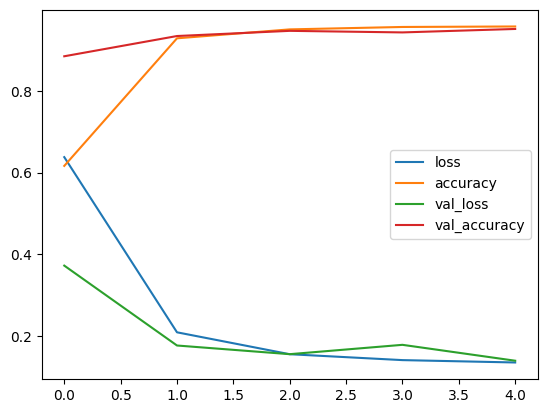

In [16]:
pd.DataFrame(model.history.history).plot()

In [17]:
model.evaluate(test)

163/163 [==============================] - 16s 100ms/step - loss: 0.1374 - accuracy: 0.9515


[0.1374376267194748, 0.9515384435653687]

In [18]:
pred_probabilities = model.predict(test)

163/163 [==============================] - 18s 112ms/step


In [25]:
predictions = pred_probabilities > 0.5
print(classification_report(test.classes,predictions))

              precision    recall  f1-score   support

           0       0.50      0.50      0.50      1300
           1       0.50      0.51      0.51      1300

    accuracy                           0.50      2600
   macro avg       0.50      0.50      0.50      2600
weighted avg       0.50      0.50      0.50      2600



In [26]:
confusion_matrix(test.classes,predictions)

array([[648, 652],
       [638, 662]], dtype=int64)